In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# EDA (Exploratory Data Analysis)

In [2]:
nyc_data = pd.read_csv('./listings.csv')

In [3]:
nyc_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,77765,Superior @ Box House,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73777,-73.95366,Hotel room,308,2,42,2022-07-18,0.30,30,217,4,NaN
1,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64529,-73.97238,Private room,299,30,9,2018-10-19,0.11,9,356,0,NaN
2,45910,Beautiful Queens Brownstone! - 5BR,204539,Mark,Queens,Ridgewood,40.70309,-73.89963,Entire home/apt,425,30,13,2019-11-12,0.10,6,365,0,NaN
3,45935,Room in Beautiful Townhouse.,204586,L,Bronx,Mott Haven,40.80635,-73.92201,Private room,60,30,0,NaN,NaN,1,83,0,NaN
4,45936,Couldn't Be Closer To Columbia Uni,867225,Rahul,Manhattan,Morningside Heights,40.80630,-73.95985,Private room,75,31,135,2022-07-11,0.95,1,219,4,NaN


In [4]:
nyc_data.nunique()

id                                39881
name                              38696
host_id                           26292
host_name                          9478
neighbourhood_group                   5
neighbourhood                       244
latitude                          21312
longitude                         18788
room_type                             4
price                              1048
minimum_nights                      130
number_of_reviews                   460
last_review                        2651
reviews_per_month                   890
calculated_host_listings_count       64
availability_365                    366
number_of_reviews_ltm               167
license                               5
dtype: int64

In [5]:
nyc_data.isnull().sum()

id                                    0
name                                 13
host_id                               0
host_name                            50
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        8362
reviews_per_month                  8362
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           39876
dtype: int64

In [6]:
nyc_data.neighbourhood_group.value_counts()

Manhattan        16847
Brooklyn         14845
Queens            6175
Bronx             1568
Staten Island      446
Name: neighbourhood_group, dtype: int64

In [7]:
len(set(nyc_data.neighbourhood))

244

In [8]:
len(set(nyc_data.minimum_nights))

130

## Minimum_nights

In [9]:
min_nights_lessthan40 = nyc_data.minimum_nights[nyc_data.minimum_nights < 30]

[Text(0.5, 1.0, 'count of minumum nights less than 30')]

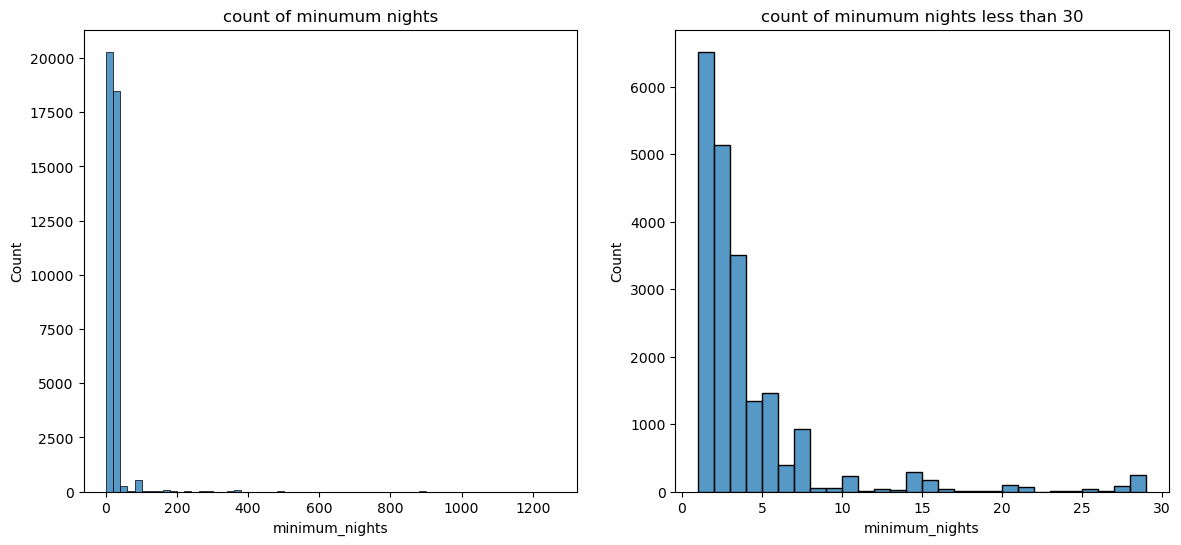

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
sns.histplot(data = nyc_data, x = 'minimum_nights', binwidth = 20, ax=ax1)
ax1.set(title="count of minumum nights")
sns.histplot(x = min_nights_lessthan40, binwidth = 1, ax=ax2)
ax2.set(title="count of minumum nights less than 30")

We see that the minimum number of nights for all reservations made on airbnb are concentrated below 5, and is right-skewed.

## price

In [11]:
nyc_data.price.describe()

count    39881.000000
mean       197.547228
std        353.332542
min          0.000000
25%         80.000000
50%        130.000000
75%        219.000000
max      16500.000000
Name: price, dtype: float64

In [12]:
df_price_subset = nyc_data.price[nyc_data.price<500]

[Text(0.5, 1.0, 'count of prices < 500')]

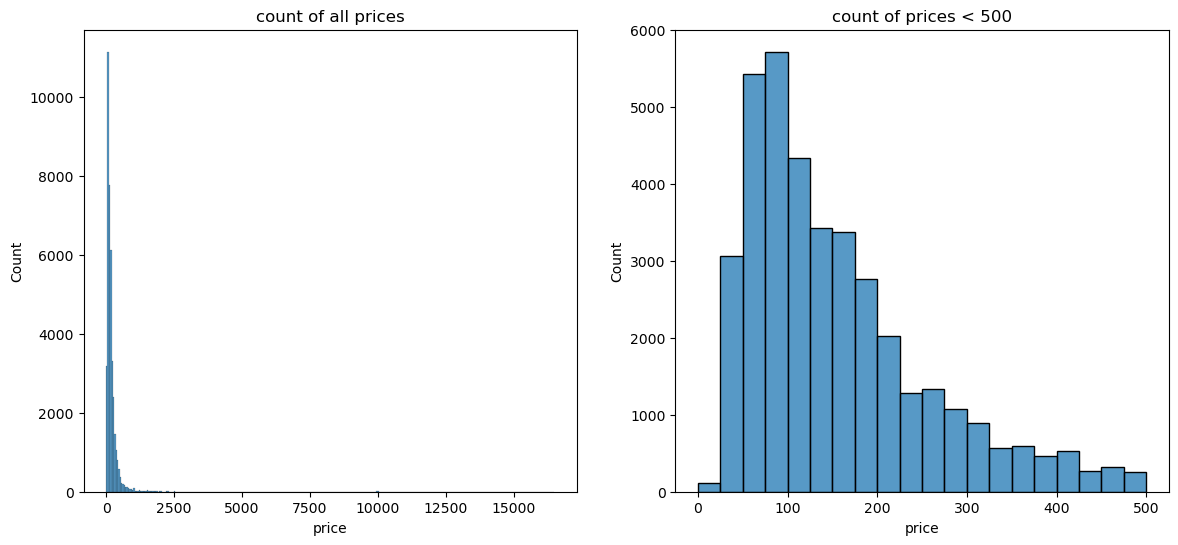

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
sns.histplot(data = nyc_data, x = 'price', binwidth=50, ax=ax1)
ax1.set(title="count of all prices")
sns.histplot(x = df_price_subset, binwidth=25, ax=ax2)
ax2.set(title="count of prices < 500")

The largest concentration of prices is below 200 dollars, with the peak near \$100. Price is right-skewed.

## Price in relation to neighbourhood_group

In [14]:
def var_summary_by_cluster(var, cluster_var, data):
    var_clusters = []
    for cluster_nm in np.unique(nyc_data[cluster_var]):
        cluster = nyc_data.loc[nyc_data[cluster_var] == cluster_nm, var]
        var_clusters.append(cluster)

    summary = map(lambda cluster: cluster.describe(), var_clusters)
    var_summary = pd.concat(summary, axis=1)
    var_summary.columns = np.unique(nyc_data[cluster_var])
    return var_summary

In [15]:
prices_summary_by_nbh_grp = var_summary_by_cluster('price', 'neighbourhood_group', nyc_data)

In [16]:
prices_summary_by_nbh_grp

,Bronx,Brooklyn,Manhattan,Queens,Staten Island
count,1568.000000,14845.000000,16847.000000,6175.000000,446.000000
mean,124.737245,157.927114,264.933341,131.365506,143.163677
std,278.572839,209.526092,473.171623,213.120396,194.997315
min,0.000000,0.000000,0.000000,0.000000,33.000000
25%,61.000000,70.000000,107.500000,60.000000,70.250000
50%,90.000000,115.000000,175.000000,94.000000,103.500000
75%,140.000000,187.000000,293.000000,150.000000,150.000000
max,9994.000000,10000.000000,16500.000000,10000.000000,2500.000000


There are significantly less Bronx and Staten Island listings, with the latter being less than 500. NYC airbnbs are clustered around Manhattan and Brooklyn and looks like Brooklyn and Manhattan are also the pricest.

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

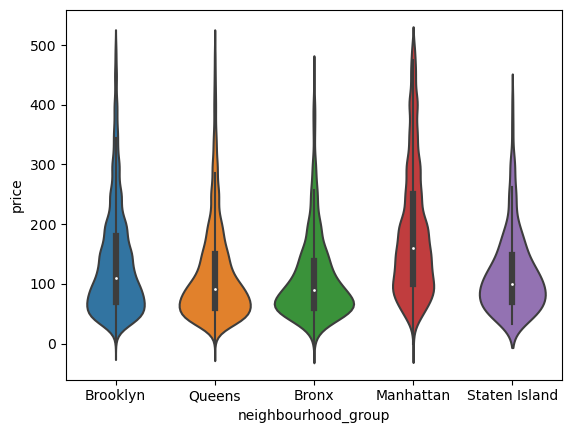

In [17]:
sns.violinplot(data = nyc_data[nyc_data.price < 500], x='neighbourhood_group', y='price')

Manhanttan has the largest median price followed by Brooklyn. 
Queens, Bronx and Staten Island have similar distributions.

## Price in relation to Room type

In [18]:
nyc_data.room_type.value_counts()

Entire home/apt    22761
Private room       16361
Shared room          557
Hotel room           202
Name: room_type, dtype: int64

<AxesSubplot:xlabel='room_type', ylabel='count'>

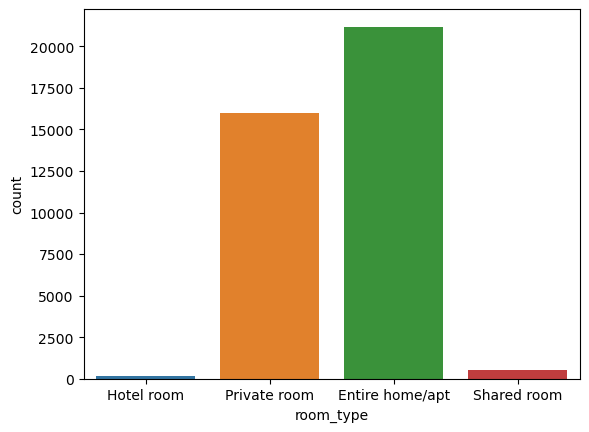

In [19]:
sns.countplot(data = nyc_data[nyc_data.price < 500], x='room_type')

<AxesSubplot:xlabel='room_type', ylabel='price'>

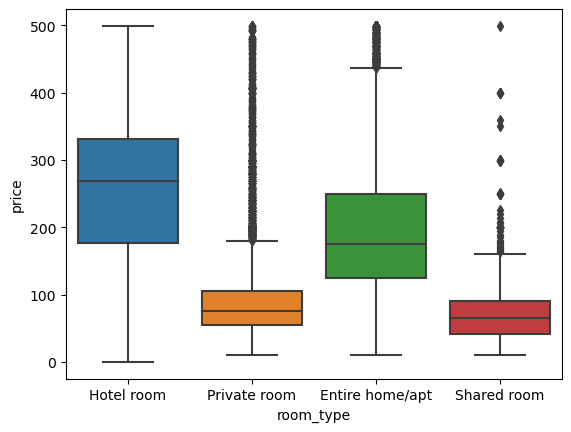

In [20]:
sns.boxplot(data = nyc_data[nyc_data.price < 500], x='room_type', y='price')

Entire home/apt and private room are the most common and naturally, also the most expensive.

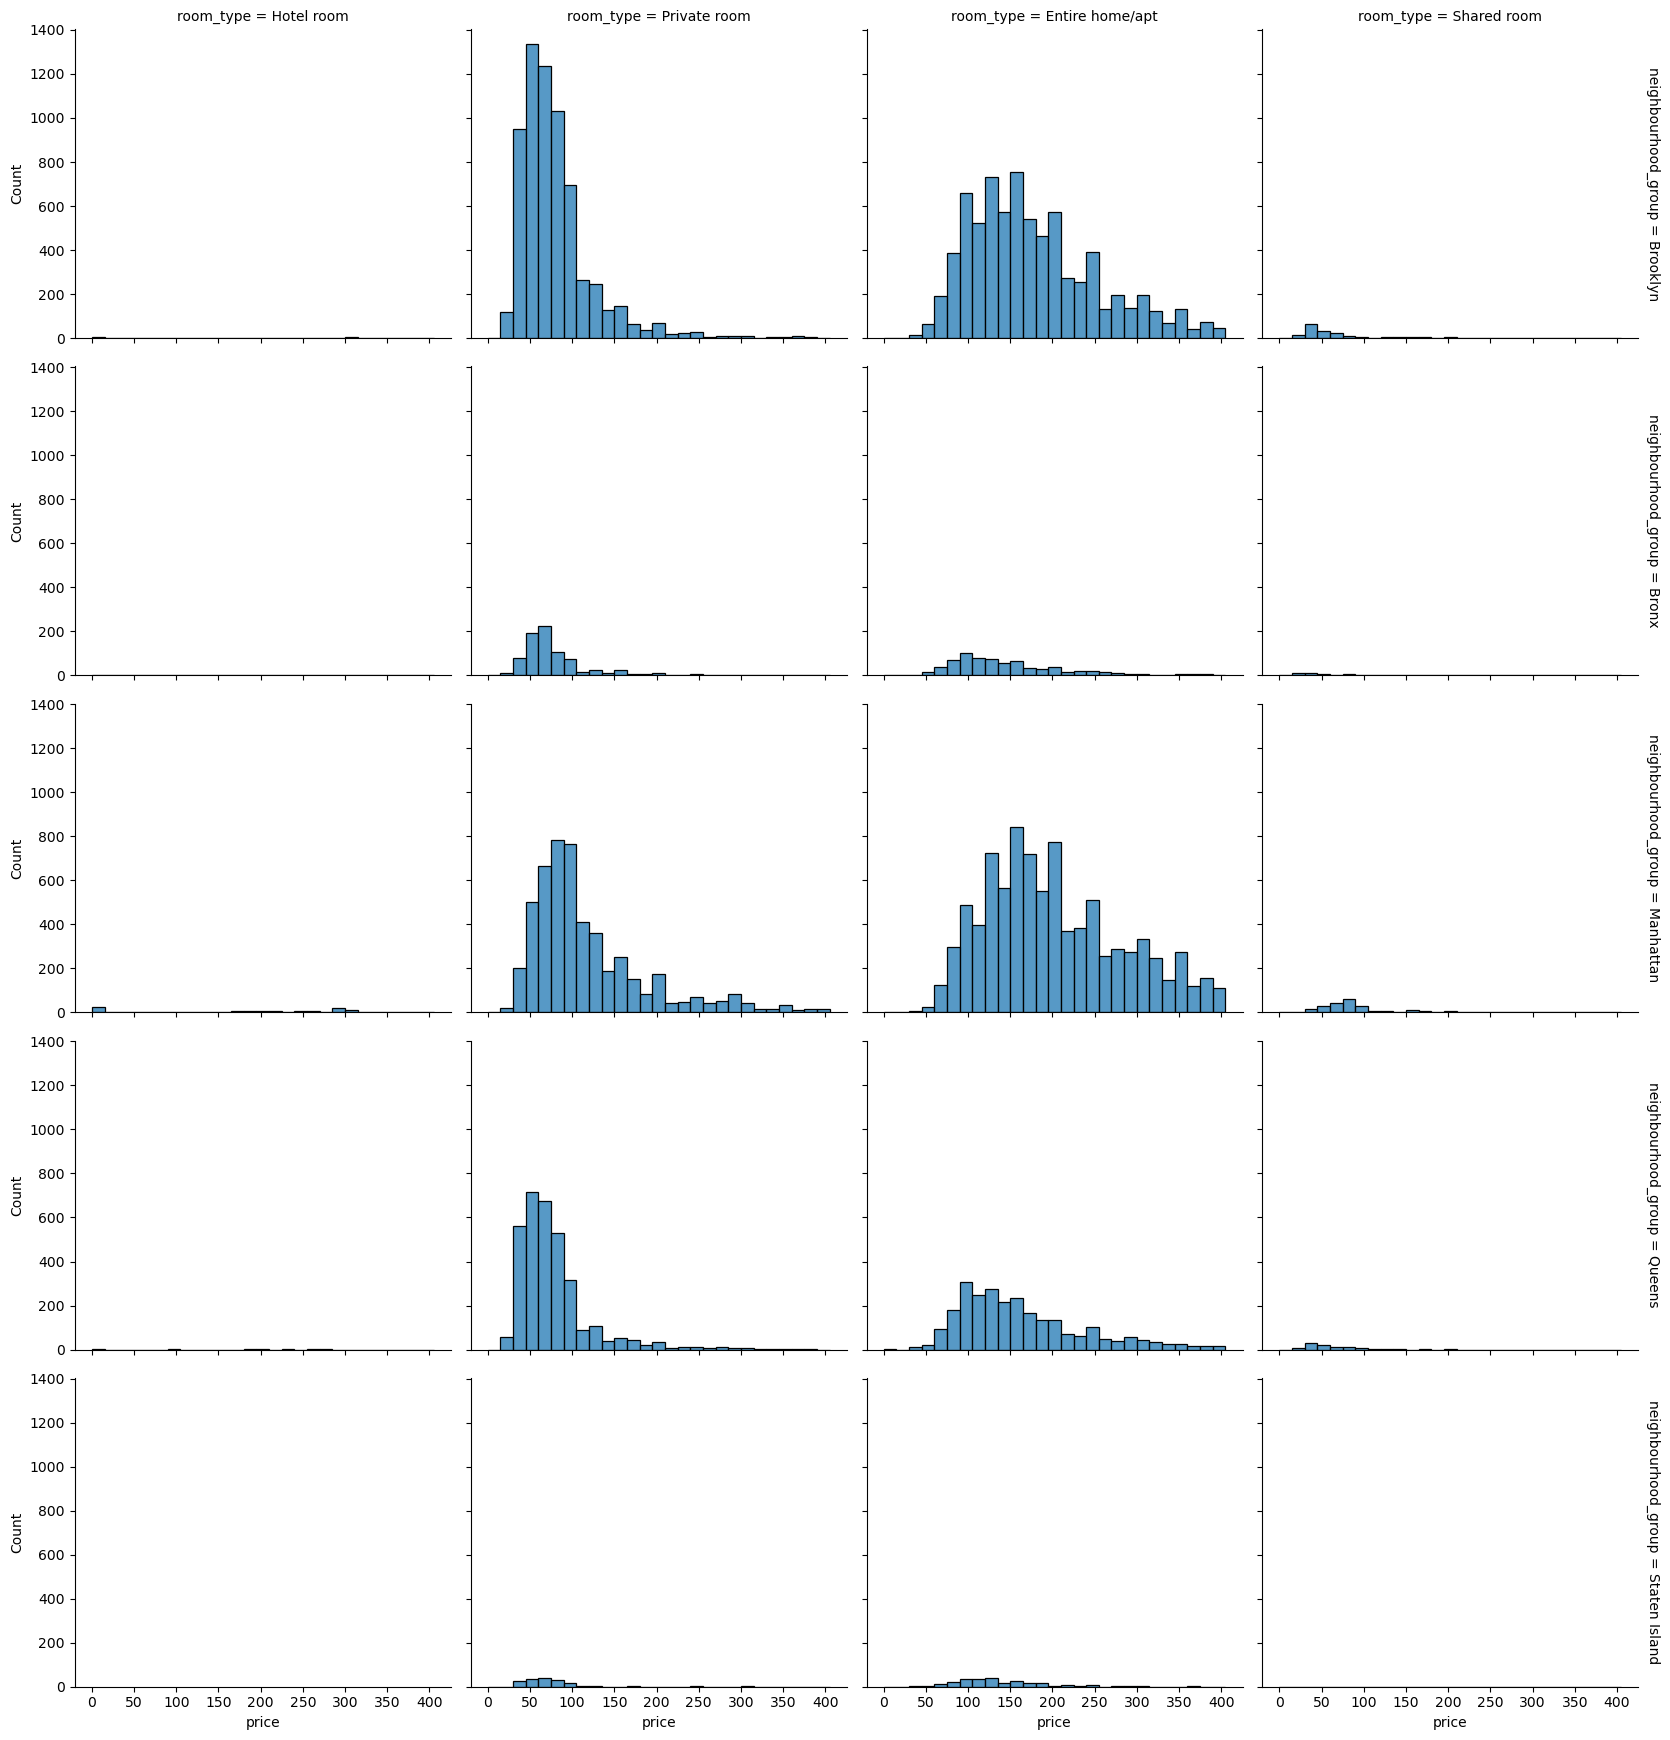

In [21]:
sns.displot(data = nyc_data[nyc_data.price < 400], x='price', binwidth = 15, col='room_type', row='neighbourhood_group', height=3.5, aspect=1.2, facet_kws=dict(margin_titles=True))

Entire home/apt is most expensive, followed by Private room. The prices of Private room have a smaller variance with a tall peak near $50-100. 
The prices in Brookyn for Private rooms are more concentrated. Manhattan is more expensive than Brooklyn in general, consistent with what we've seen earlier.

## catplot for price of the room types in relation to neighbourhoods groups

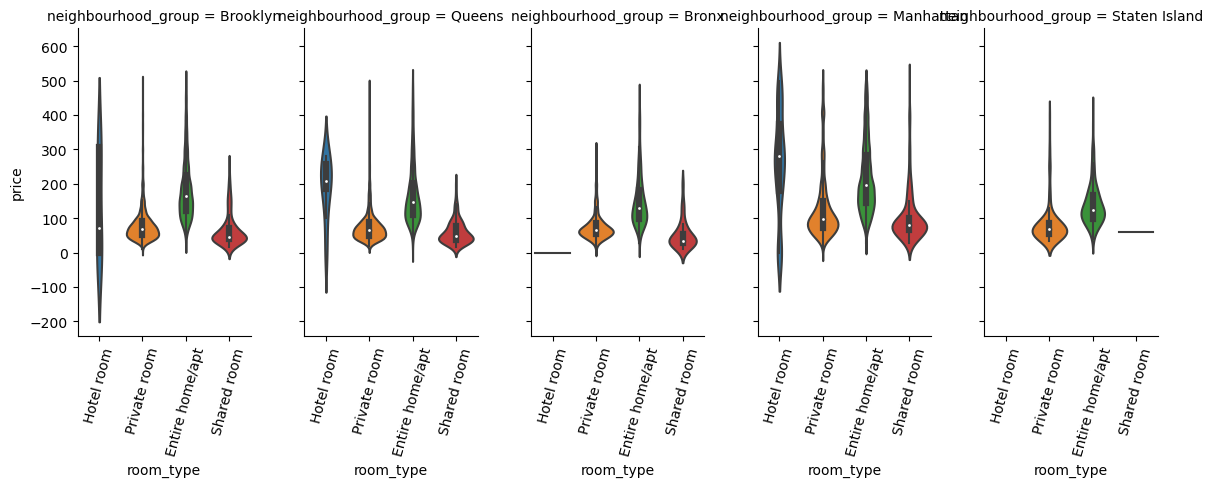

In [22]:
catplot = sns.catplot(x='room_type', y = 'price', col='neighbourhood_group', data = nyc_data[nyc_data.price < 500], kind='violin',col_wrap=5, height=4, aspect= 0.6)
catplot.set_xticklabels(rotation=75)

## Count of room types in relation to top 10 most listing-populated neighbourhood

In [23]:
popular_neighbourhood = nyc_data.neighbourhood.value_counts().head(10)
df_pop_neighbourhood = nyc_data.loc[nyc_data['neighbourhood'].isin(popular_neighbourhood.index)]

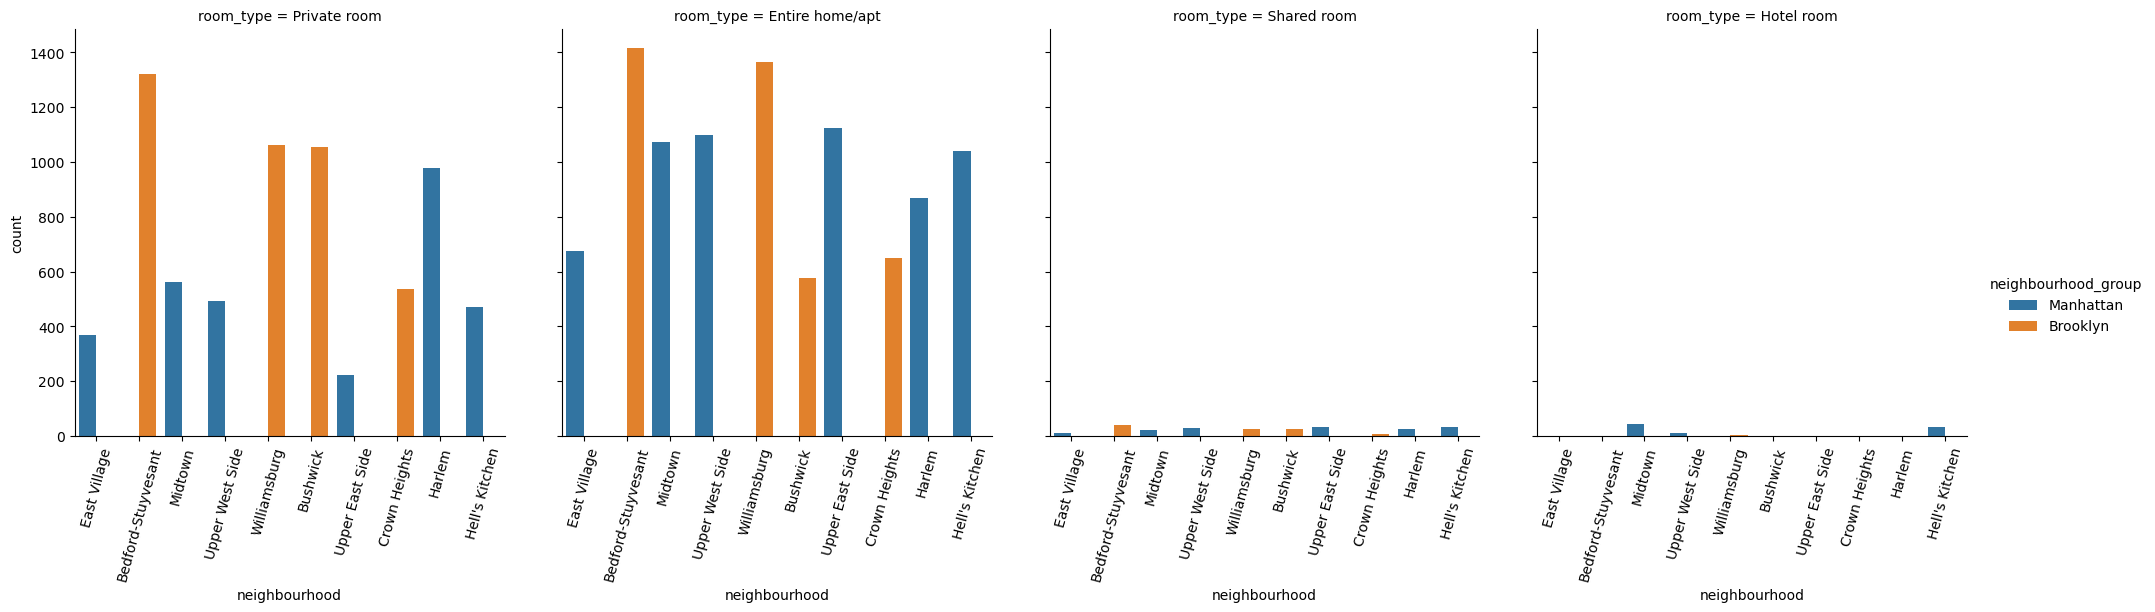

In [24]:
catplot_rmtype = sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data = df_pop_neighbourhood, kind='count')
catplot_rmtype.set_xticklabels(rotation=75)

The 10 most listing-populated neighborhoods belong to only 2 neighbourhood groups: Manhattan and Brooklyn, which is expected as Manhattan and Brooklyn have the most abundant listings and are the most traveled. We also observe that Bedford-Stuyvesant and Williamsburg are the most popular for Brooklyn, while Harlem is the most popular for Manhattan, for Private rooms at least.

## distributions of the price of the 10 most listing-populated neighbourhoods

In [25]:
df_price_lt400_top10_neighbourhoods = nyc_data.loc[(nyc_data['neighbourhood'].isin(popular_neighbourhood.index)) & (nyc_data['price'] < 400)]

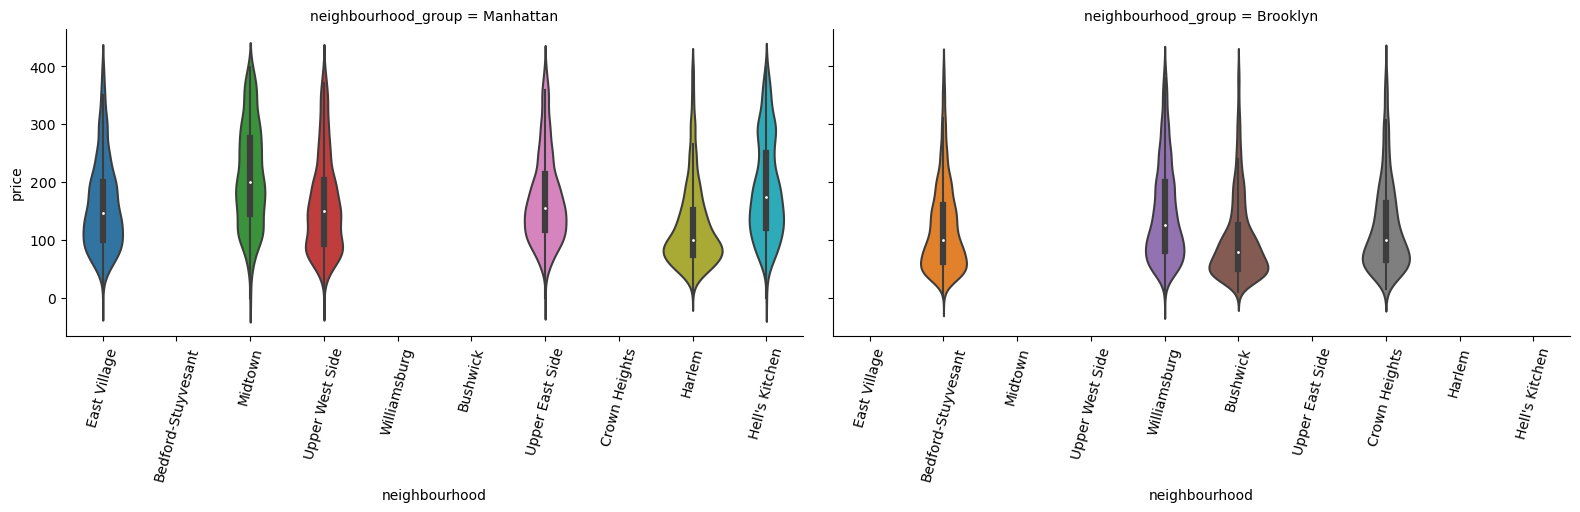

In [26]:
catplot_neighbourhood = sns.catplot(x='neighbourhood', y='price', col='neighbourhood_group', data = df_price_lt400_top10_neighbourhoods, kind='violin', height=4, aspect= 2)
catplot_neighbourhood.set_xticklabels(rotation=75)

Prices for Harlem and Bushwick have less variance. Midtown and Hell's kitchen are most expensive in Manhattan, whereas for Brooklyn, Williamsburg is priced higher.

## distributions of the price of the 10 most expensive neighbourhoods

In [27]:
expensive_neighbourhoods = nyc_data.groupby('neighbourhood')['price'].median().sort_values(ascending=False).head(10).index

In [28]:
expensive_neighbourhoods

Index(['Fort Wadsworth', 'Hollis Hills', 'Tribeca', 'Theater District',
       'Willowbrook', 'Navy Yard', 'Financial District', 'Prospect Park',
       'Tottenville', 'Neponsit'],
      dtype='object', name='neighbourhood')

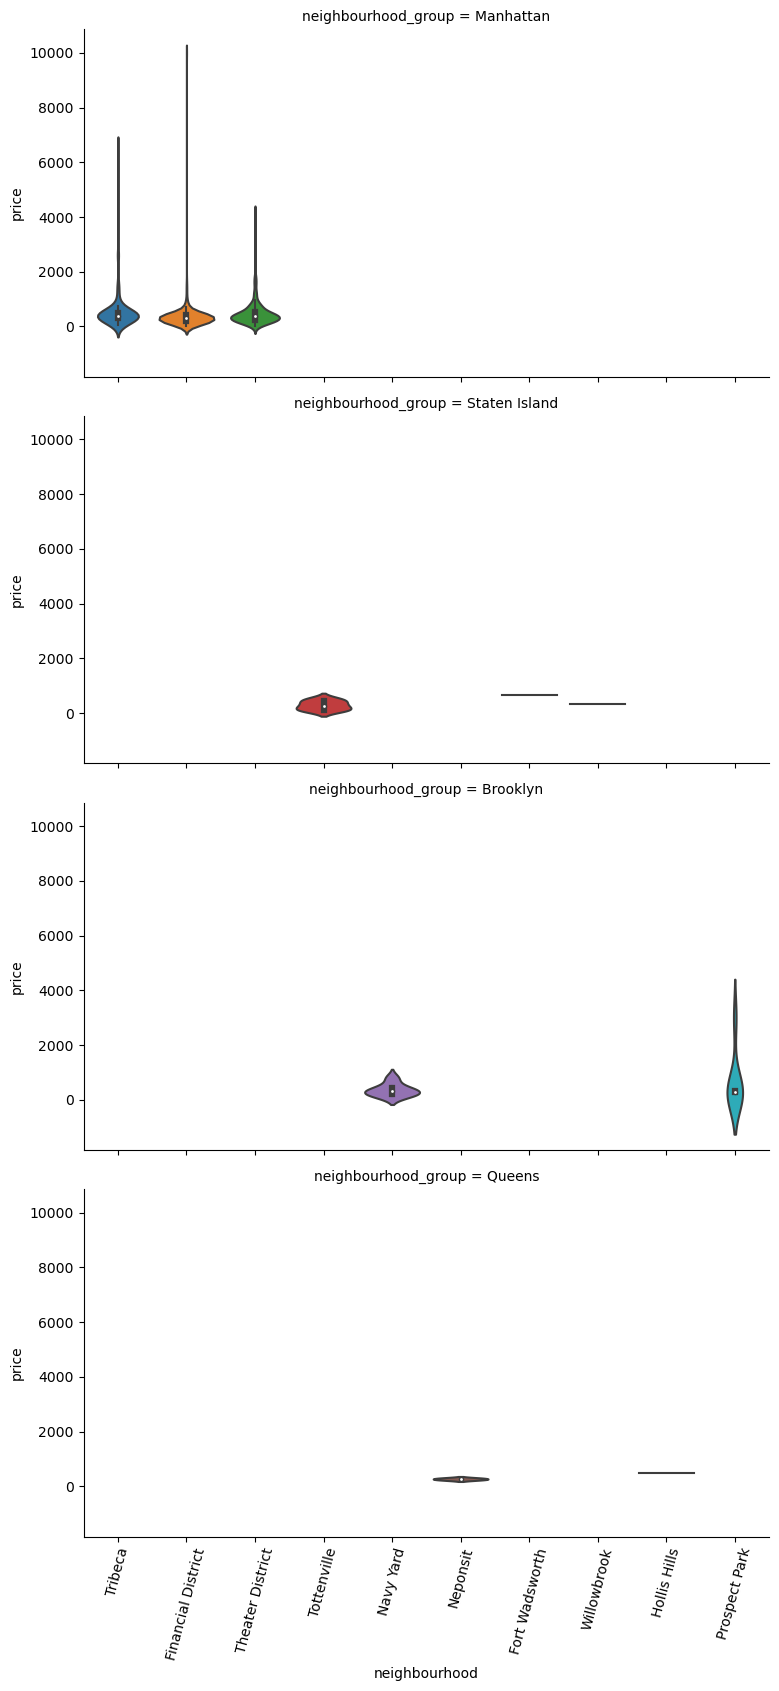

In [29]:
df_expensive_neighbourhoods = nyc_data[nyc_data.neighbourhood.isin(expensive_neighbourhoods)]
catplot_expensive = sns.catplot(x='neighbourhood', y='price', col = 'neighbourhood_group', data = df_expensive_neighbourhoods, kind='violin', col_wrap = 1,height=4, aspect= 2)
catplot_expensive.set_xticklabels(rotation=75)

A majority of the most expensive neighbourhoods fall under Manhattan. Financial District has some extreme outliers. There are limited data points for the other neighbourhoods.

In [30]:
df_expensive_neighbourhoods.neighbourhood.value_counts()

Financial District    482
Theater District      322
Tribeca               246
Tottenville             8
Navy Yard               7
Prospect Park           7
Neponsit                2
Fort Wadsworth          1
Willowbrook             1
Hollis Hills            1
Name: neighbourhood, dtype: int64

## distributions of the price of the 10 least expensive neighbourhoods

In [31]:
cheapest_neighbourhoods = nyc_data.groupby('neighbourhood')['price'].median().sort_values(ascending=True).head(10).index

In [32]:
cheapest_neighbourhoods

Index(['Grant City', 'New Dorp', 'Woodside', 'Hunts Point',
       'University Heights', 'Bull's Head', 'West Brighton', 'Mariners Harbor',
       'Elmhurst', 'Borough Park'],
      dtype='object', name='neighbourhood')

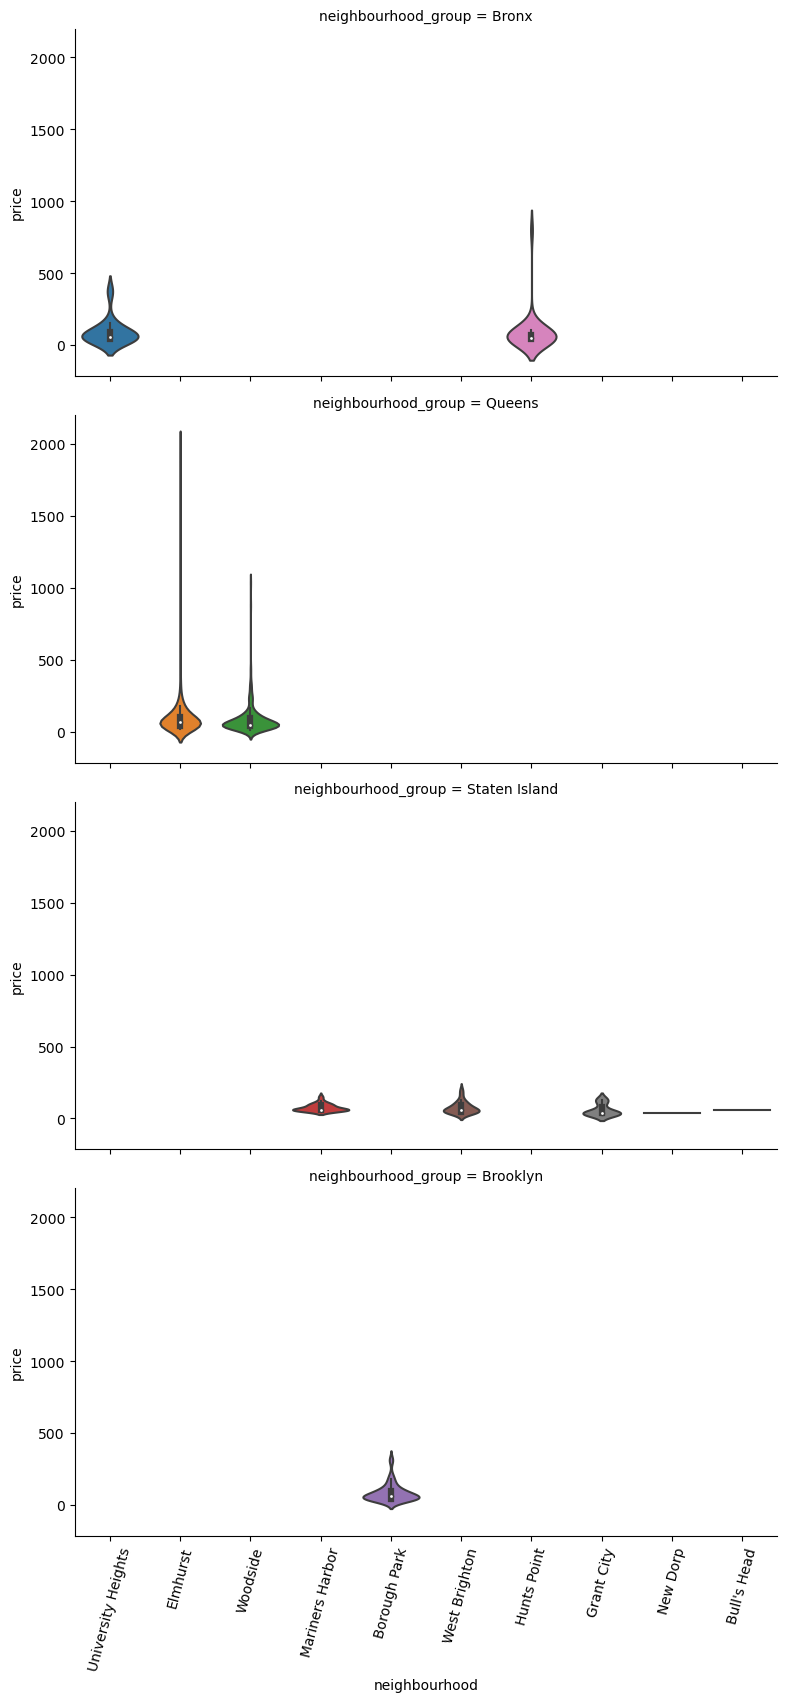

In [33]:
df_cheapest_neighbourhoods = nyc_data[nyc_data.neighbourhood.isin(cheapest_neighbourhoods)]
catplot_cheap = sns.catplot(x='neighbourhood', y='price', data = df_cheapest_neighbourhoods, col = 'neighbourhood_group', col_wrap = 1, kind='violin', height=4, aspect= 2)
catplot_cheap.set_xticklabels(rotation=75)

The cheapest neighbourhoods fall under Staten Island, Bronx, and Queens, as well as Brooklyn surprisingly. All of them have fairly small number of data.

## Number of reviews in relation to price

<AxesSubplot:xlabel='number_of_reviews', ylabel='price'>

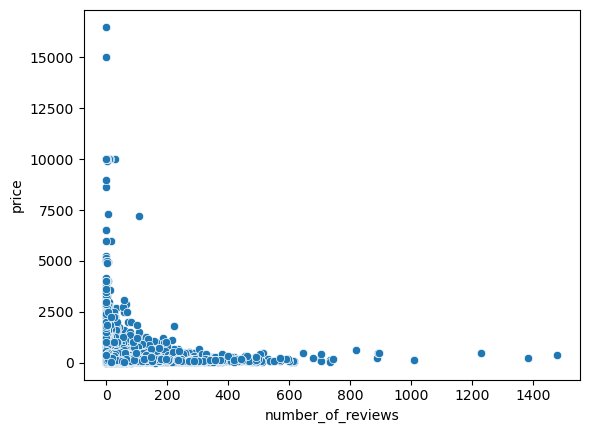

In [34]:
sns.scatterplot(x='number_of_reviews', y = 'price', data = nyc_data)

We see that the most expensive airbnbs have very little reviews, and the number of reviews and price are negatively correlated. It is probable that the low number of reviews for expensive airbnbs is due to nicer experiences, as customers are more inclined to leave reviews if they have negative experiences, or simply due to the low demand for expensive airbnbs when cheaper alternatives are available.

## latitude and longtitude

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

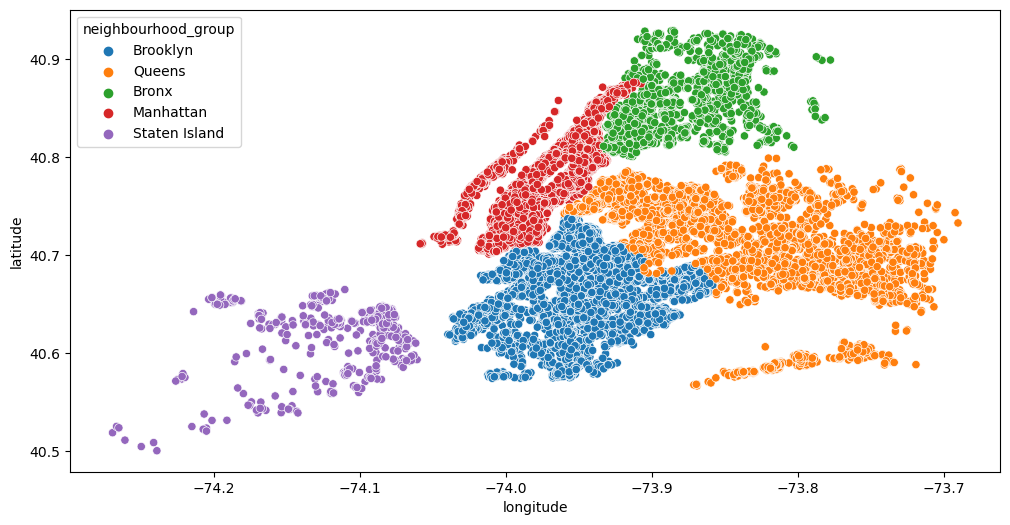

In [35]:
fig = plt.figure(figsize=(12,6))
sns.scatterplot(x='longitude', y = 'latitude', data = nyc_data, hue='neighbourhood_group')

## Price in relation to availability

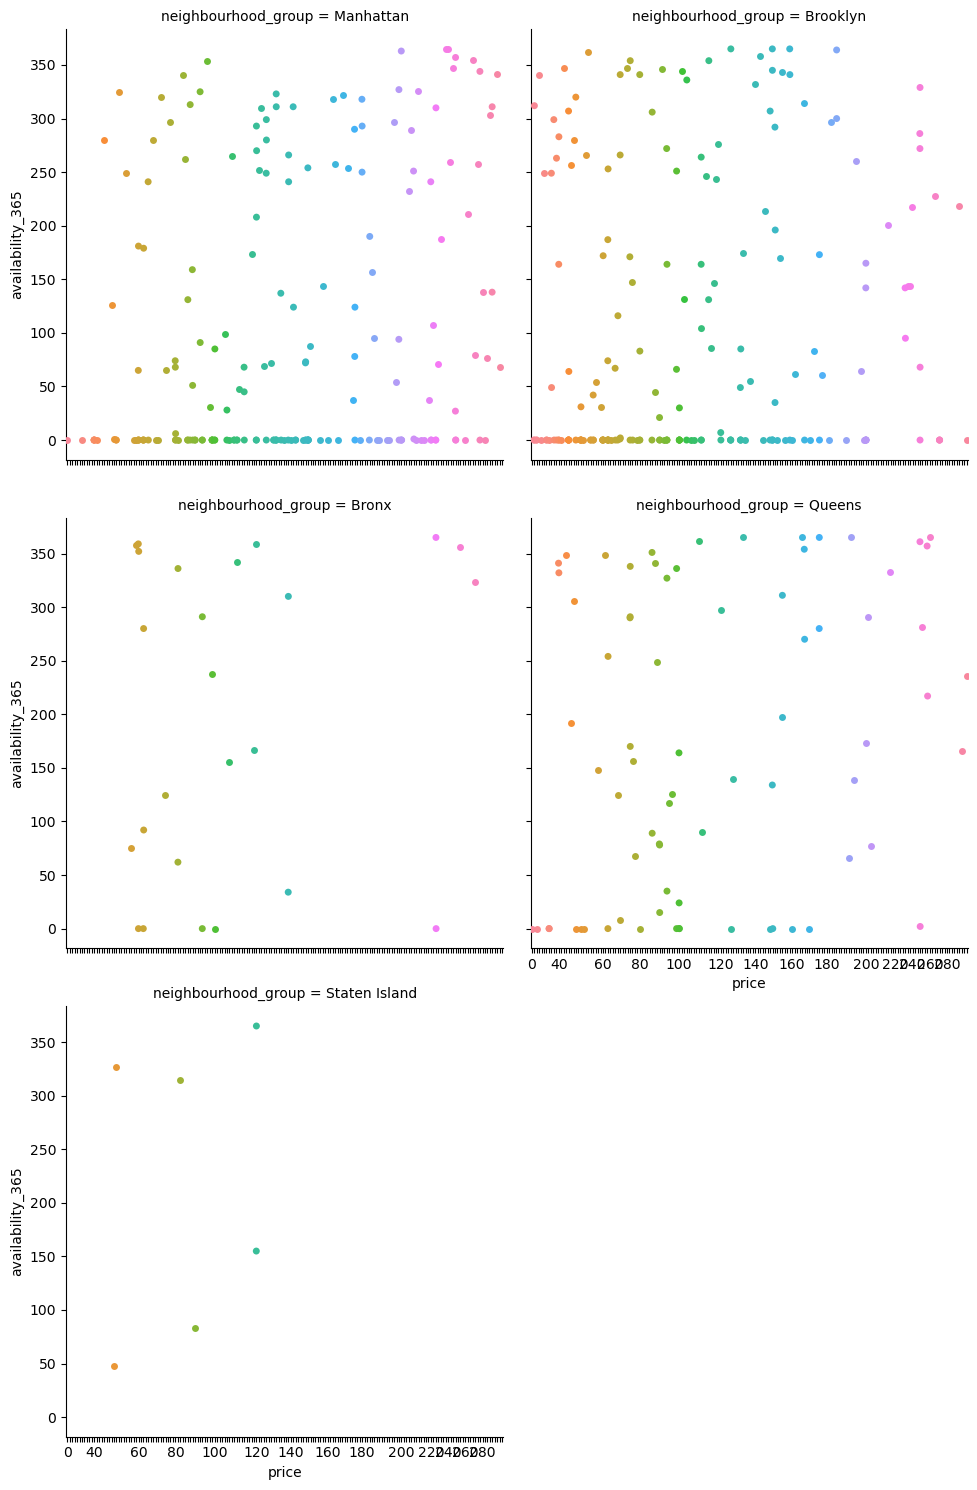

In [36]:
plot = sns.catplot(y='availability_365', x = 'price', data = nyc_data[nyc_data.price < 300].sample(500), col='neighbourhood_group', kind='strip', col_wrap = 2)

for ax in plot.axes.flat:
    for label in ax.get_xticklabels():
        if np.int(label.get_text()) % 20 == 0:  
            label.set_visible(True)
        else:
            label.set_visible(False)

It doesn't seem like the availability of the airbnbs have an impact on the pricing.

In [37]:
from collections import Counter
min_nights_counter = Counter(nyc_data.minimum_nights)

In [38]:
min_nights_counter.most_common(10)

[(30, 17235),
 (1, 6518),
 (2, 5127),
 (3, 3509),
 (5, 1456),
 (4, 1335),
 (7, 926),
 (31, 706),
 (90, 513),
 (6, 395)]

These are the most common values for minimum nights. Below are plots to illustrate.

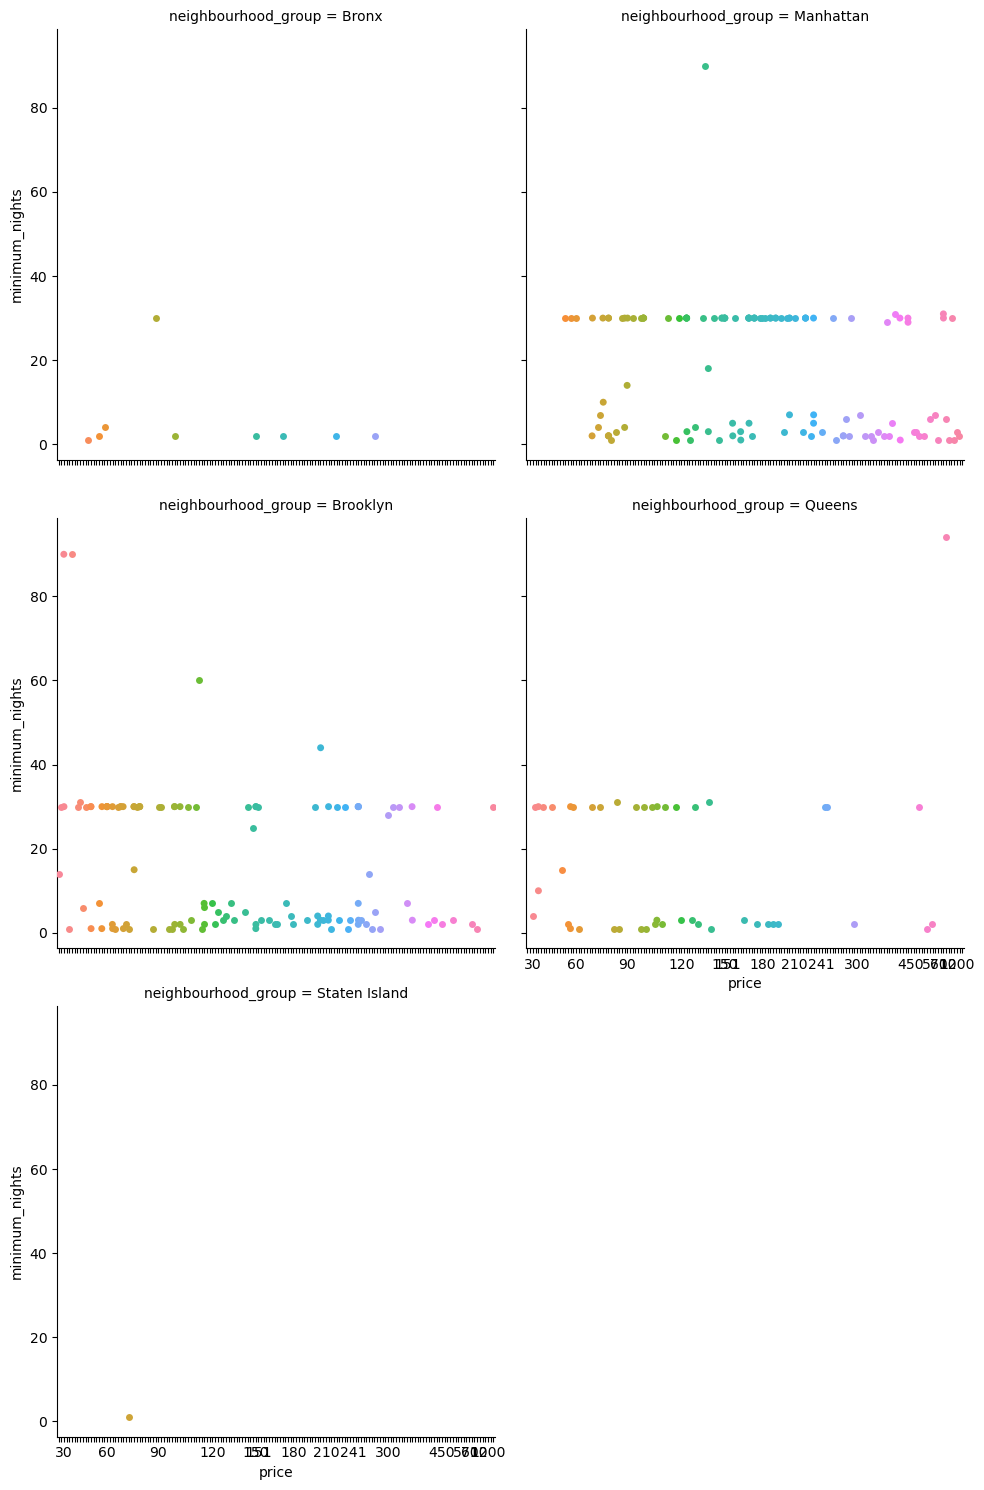

In [39]:
plot = sns.catplot(y='minimum_nights', x = 'price', data = nyc_data.sample(300), col='neighbourhood_group', kind='strip', col_wrap = 2)

for ax in plot.axes.flat:
    for label in ax.get_xticklabels():
        if (np.int(label.get_text()) % 30 == 0) or (np.int(label.get_text()) % 30 == 1):  
            label.set_visible(True)
        else:
            label.set_visible(False)

In [40]:
nyc_data[nyc_data.minimum_nights > 365]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
588,568684,800sqft apartment with huge terrace,2798644,Alessandra,Brooklyn,Bushwick,40.70073,-73.92245,Entire home/apt,115,370,6,2018-04-15,0.06,1,0,0,NaN
2115,2942732,"Large 1 bdrm, River views!",160337,Sanjna,Manhattan,Washington Heights,40.83563,-73.94786,Entire home/apt,60,1124,9,2019-06-15,0.09,1,365,0,NaN
2900,4204302,Prime W. Village location 1 bdrm,17550546,Genevieve,Manhattan,Greenwich Village,40.73293,-73.99782,Entire home/apt,180,1250,2,2014-11-09,0.02,1,0,0,NaN
3566,5431845,Beautiful Fully Furnished 1 bed/bth,3680008,Aliya,Queens,Long Island City,40.75279,-73.94089,Entire home/apt,134,500,30,2018-06-24,0.33,1,90,0,NaN
3990,6169897,Wonderful Large 1 bedroom,10720264,John,Manhattan,Harlem,40.82044,-73.95624,Entire home/apt,75,500,0,NaN,NaN,1,0,0,NaN
4355,6619187,Stylish NYC Art Loft,34643568,Dave,Manhattan,East Harlem,40.79279,-73.93919,Private room,85,900,33,2019-12-08,0.38,7,364,0,NaN
5488,8341919,Brand New Luxury Apt Lease Takeover,43945071,Shining,Queens,Long Island City,40.74638,-73.95618,Entire home/apt,199,480,0,NaN,NaN,1,0,0,NaN
5553,8668115,Zen Room in Crown Heights Brooklyn,8996336,Laura,Brooklyn,Crown Heights,40.67042,-73.94839,Private room,50,500,10,2016-09-22,0.12,1,364,0,NaN
7288,11096888,Peaceful apartment close to F/G,2228137,Amanda,Brooklyn,Windsor Terrace,40.64931,-73.97977,Private room,45,500,0,NaN,NaN,1,358,0,NaN
8004,12888849,"Bright Luxury Studio, Central Loc.",16476167,Sarah,Manhattan,Midtown,40.74663,-73.98487,Entire home/apt,250,366,0,NaN,NaN,1,0,0,NaN


In [41]:
nyc_data[nyc_data.availability_365 > 365]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license


These listings have minimum nights set to more than 365 days. At least availability fits within the normal range.

## Relationship between NAs and Price

In [42]:
from random import sample
ids_of_na_rows = nyc_data[nyc_data.drop("license", axis = 1).isnull().any(axis=1)].id
nyc_data_w_nas = nyc_data[nyc_data.id.isin(ids_of_na_rows)]
nyc_data_w_no_nas = nyc_data[~nyc_data.id.isin(ids_of_na_rows)]
d = {'1 or more NAs': nyc_data_w_nas.loc[nyc_data_w_nas.index, "price"], '0 NAs': nyc_data_w_no_nas.loc[nyc_data_w_no_nas.index, "price"]}
df1 = pd.DataFrame(data = d)

In [43]:
nyc_data_w_nas.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,8.376000e+03,8.376000e+03,8376.000000,8376.000000,8376.000000,8376.000000,8376.000000,14.000000,8376.000000,8376.000000,8376.0
mean,2.110355e+17,1.433998e+08,40.732375,-73.950771,251.956065,28.459647,0.008596,0.073571,42.750597,130.850883,0.0
std,3.066598e+17,1.513049e+08,0.054726,0.054194,530.000549,37.932840,0.410516,0.117317,106.972780,148.341598,0.0
min,1.194300e+04,2.787000e+03,40.511115,-74.269520,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.0
25%,2.315659e+07,1.778161e+07,40.695512,-73.985222,74.000000,6.000000,0.000000,0.010000,1.000000,0.000000,0.0
50%,4.677480e+07,7.988678e+07,40.733327,-73.958710,140.500000,30.000000,0.000000,0.030000,1.000000,37.000000,0.0
75%,6.171676e+17,2.445370e+08,40.762478,-73.930847,269.000000,30.000000,0.000000,0.047500,10.000000,299.000000,0.0
max,7.098549e+17,4.782606e+08,40.927440,-73.690060,16500.000000,999.000000,28.000000,0.400000,453.000000,365.000000,0.0


In [44]:
nyc_data_w_no_nas.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,3.150500e+04,3.150500e+04,31505.000000,31505.000000,31505.000000,31505.000000,31505.000000,31505.000000,31505.000000,31505.000000,31505.000000
mean,9.102510e+16,1.281362e+08,40.727938,-73.944307,183.081955,16.651801,33.784669,1.245254,10.067037,131.717727,9.815934
std,2.211445e+17,1.438360e+08,0.059583,0.058735,286.993967,28.963864,61.371835,1.991990,35.067650,135.816271,20.649896
min,2.539000e+03,2.438000e+03,40.500314,-74.266750,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000
25%,1.514976e+07,1.280606e+07,40.686350,-73.982650,80.000000,2.000000,3.000000,0.140000,1.000000,0.000000,0.000000
50%,3.497674e+07,5.545020e+07,40.722700,-73.952690,130.000000,5.000000,10.000000,0.570000,1.000000,81.000000,2.000000
75%,5.141097e+07,2.195179e+08,40.763440,-73.924500,204.000000,30.000000,36.000000,1.790000,3.000000,271.000000,12.000000
max,7.072726e+17,4.772572e+08,40.928810,-73.699730,10000.000000,1250.000000,1480.000000,123.000000,453.000000,365.000000,949.000000


<AxesSubplot:title={'center':'prices of listings with NAs and without'}>

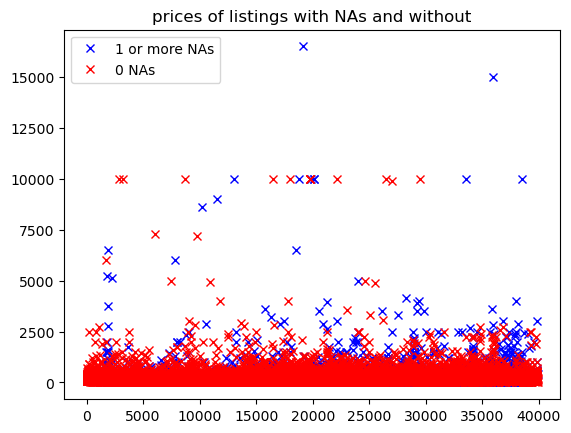

In [45]:
df1.plot(style=['bx','rx'], title = "prices of listings with NAs and without")

It seems that prices are higher for listings with NA values.

## Data cleaning and Feature Engineering

In [145]:
nyc_data.isnull().sum()

id                                    0
name                                 13
host_id                               0
host_name                            50
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        8362
reviews_per_month                  8362
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           39876
availability_bins                     0
dtype: int64

We see that NAs for last_review and reviews_per_month correspond to listings with 0 reviews. Hence I will add another column to note that called zero_reviews.

In [146]:
nyc_data[nyc_data.last_review.isnull()].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,availability_bins
3,45935,Room in Beautiful Townhouse.,204586,L,Bronx,Mott Haven,40.80635,-73.92201,Private room,60,30,0,NaN,NaN,1,83,0,NaN,0
23,51438,1 Bedroom in 2 Bdrm Apt- Upper East,236421,Jessica,Manhattan,Upper East Side,40.77449,-73.95308,Private room,130,14,0,NaN,NaN,2,0,0,NaN,0
38,54466,Beautiful Uptown Manhattan apartmnt,253385,Douglas,Manhattan,Harlem,40.80255,-73.95803,Private room,200,30,0,NaN,NaN,1,365,0,NaN,3
51,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,30,0,NaN,NaN,1,0,0,NaN,0
113,113092,Rm in Beautiful Luxury Apt. Bldg,575906,San,Brooklyn,Fort Greene,40.69050,-73.97867,Private room,90,30,0,NaN,NaN,1,0,0,NaN,0


In [ ]:
X = nyc_data.drop(['name', 'host_name','id','host_id', 'price', 'license'], axis = 1)
X['zero_reviews'] = X['last_review'].isna() & X['reviews_per_month'].isna()
X.drop('last_review', axis = 1, inplace=True)
X['reviews_per_month'] = X['reviews_per_month'].fillna(value=0)

Non-nominal data are removed. reviews_per_month is removed to prevent noise and overfitting.

### Log Transformation

In [190]:
X['price_log'] = np.log(nyc_data.price+1)

<AxesSubplot:xlabel='price_log', ylabel='Density'>

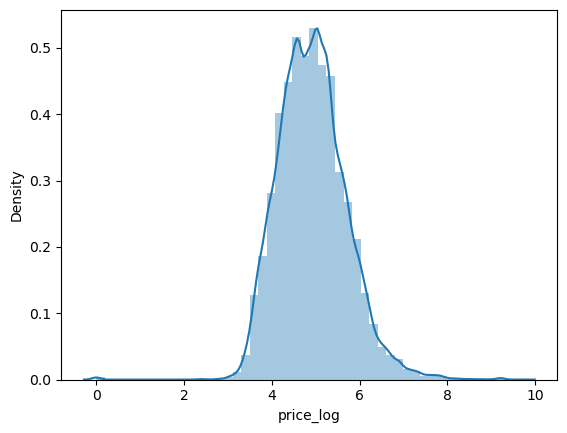

In [191]:
sns.distplot(X['price_log'])

The log price looks to fit a normal distribution pretty well.
The good fit indicates that normality is a reasonable approximation.

### Binning availability to reduce noise and non-linearity

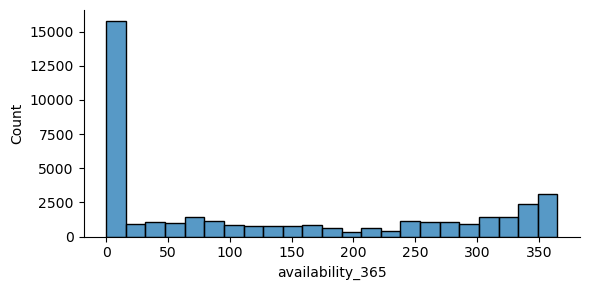

In [192]:
sns.displot(data =X, x = 'availability_365', height=3, aspect = 2)

In [193]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
n_bins = 4
availability_bins = label_encoder.fit_transform(pd.cut(X.availability_365, n_bins, retbins=True)[0])

In [194]:
X["availability_bins"] = availability_bins
X.drop('availability_365', axis = 1, inplace=True)

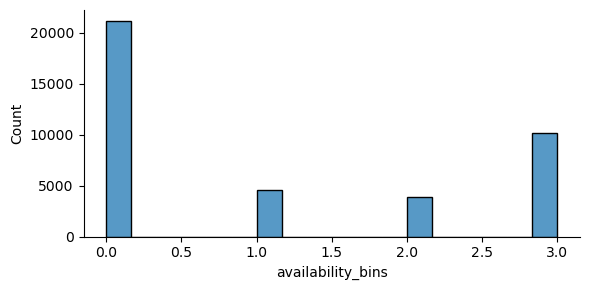

In [195]:
sns.displot(data = X, x = 'availability_bins', height=3, aspect=2)

I will also drop number_of_reviews given that we have two other arguably more informational variables, number_of_reviews_ltm and reviews_per_month, to encode the information given by number_of_reviews. The zero_reviews binary column added previously will also cover the cases when the listing has value 0 for number_of_reviews.


In [196]:
X.drop('number_of_reviews', axis = 1, inplace=True)

### VIF

In [197]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_features = X.select_dtypes(include=numerics)
categorical_features = X.select_dtypes(include=['object'])

print('Numerical features: %s' % (numerical_features.columns))
print('Categorical features: %s' % (categorical_features.columns))

Numerical features: Index(['latitude', 'longitude', 'minimum_nights', 'reviews_per_month',
       'calculated_host_listings_count', 'number_of_reviews_ltm',
       'availability_bins', 'price_log'],
      dtype='object')
Categorical features: Index(['neighbourhood_group', 'neighbourhood', 'room_type'], dtype='object')


In [198]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_features = X.select_dtypes(include=numerics)

vif_data = pd.DataFrame()
vif_data["feature"] = numerical_features.drop('price_log', axis = 1).columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(numerical_features.drop('price_log', axis = 1).values, i)
                          for i in range(len(numerical_features.drop('price_log', axis = 1).columns))]

In [199]:
vif_data

,feature,VIF
0,latitude,358535.477487
1,longitude,358507.739750
2,minimum_nights,1.460375
3,reviews_per_month,4.098745
4,calculated_host_listings_count,1.122848
5,number_of_reviews_ltm,3.658933
6,availability_bins,1.788097


We know latitude and longitude are collinear, so I will combine them into a single variable.

In [200]:
X['avg_long_lat'] = (X['longitude'] + X['latitude'])/2
X.drop(['longitude', 'latitude'], axis = 1, inplace=True)

By the same argument, I will combine reviews_per_month and number_of_reviews_ltm giving them equal weights.

In [201]:
X['reviews_per_month_and_reviews_ltm'] = (X['reviews_per_month'] + X['number_of_reviews_ltm'])/2
X.drop(['reviews_per_month', 'number_of_reviews_ltm'], axis = 1, inplace=True)

In [202]:
numerical_features = X.select_dtypes(include=numerics)

vif_data = pd.DataFrame()
vif_data["feature"] = numerical_features.drop('price_log', axis = 1).columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(numerical_features.drop('price_log', axis = 1).values, i)
                          for i in range(len(numerical_features.drop('price_log', axis = 1).columns))]

In [203]:
vif_data

,feature,VIF
0,minimum_nights,1.450827
1,calculated_host_listings_count,1.118710
2,availability_bins,1.771430
3,avg_long_lat,2.362760
4,reviews_per_month_and_reviews_ltm,1.258747


# Correlation

<AxesSubplot:>

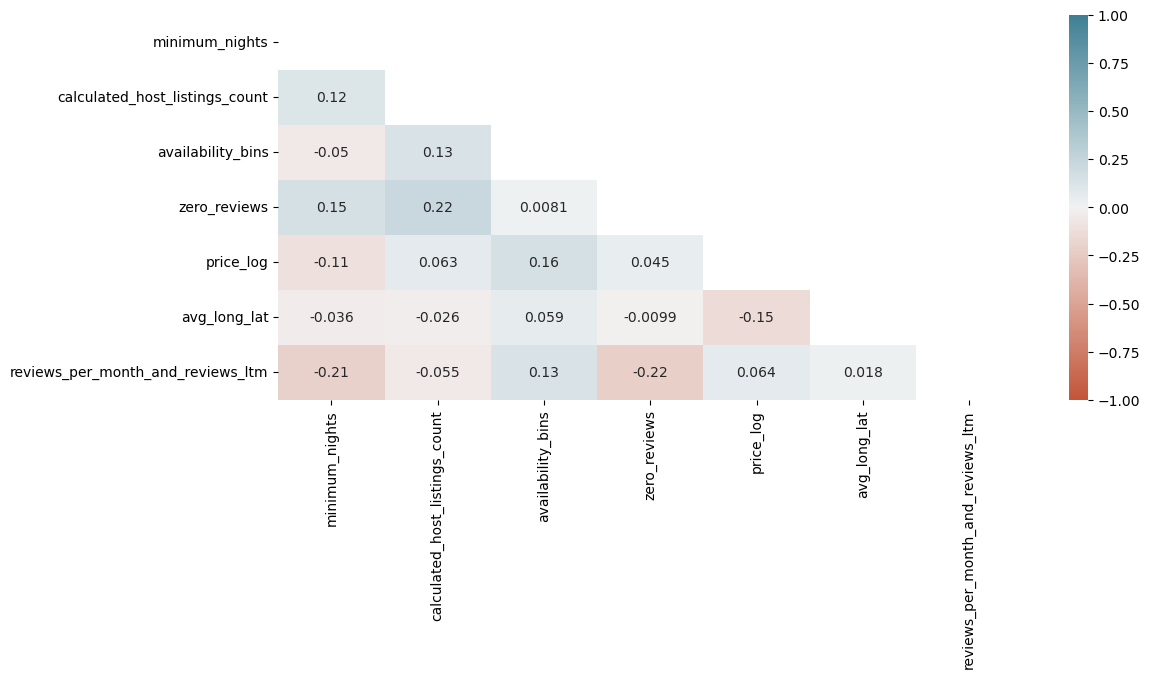

In [204]:
corr = X.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(20, 220, as_cmap=True)

plt.figure(figsize=(12,5))
sns.heatmap(corr, vmin = -1, vmax = 1, cmap = cmap, mask=mask, annot = True)

### One Hot Encoding

In [205]:
categorical_features_one_hot = pd.get_dummies(categorical_features)

X_onehot = pd.concat([X.select_dtypes(include=numerics), categorical_features_one_hot], axis=1)
X_onehot.head()

,minimum_nights,calculated_host_listings_count,availability_bins,price_log,avg_long_lat,reviews_per_month_and_reviews_ltm,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,...,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,2,30,2,5.733341,-16.607945,2.150,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,30,9,3,5.703782,-16.663545,0.055,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,30,6,3,6.054439,-16.598270,0.050,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,30,1,0,4.110874,-16.557830,0.000,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,31,1,2,4.330733,-16.576775,2.475,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


### Split data into train and test

In [206]:
from sklearn.model_selection import train_test_split
y = X.price_log
X_train, X_test, y_train, y_test = train_test_split(X_onehot.drop('price_log', axis = 1), y, test_size=0.2, random_state=42)

### RobustScaler

In [207]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# PCA

In [208]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.decomposition import PCA
n_features_to_test = np.arange(1, len(X_train[0]), 25)

grid = GridSearchCV(PCA(),
                    param_grid=[{'n_components': n_features_to_test}],
                    cv=5)

grid.fit(X_train)

GridSearchCV(cv=5, estimator=PCA(),
             param_grid=[{'n_components': array([  1,  26,  51,  76, 101, 126, 151, 176, 201, 226, 251])}])

In [209]:
X_train_pca = grid.transform(X_train)
X_test_pca = grid.transform(X_test)
pca = grid.best_estimator_
print(pca.explained_variance_ratio_[:10])
print(len(pca.explained_variance_ratio_))

[9.77361298e-01 1.29269429e-02 2.45127831e-03 1.97906826e-03
 1.22932487e-03 8.38848980e-04 4.32723491e-04 3.54229133e-04
 1.59728590e-04 1.26105704e-04]
201


# Model Selection

In [214]:
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline

def get_models():
    models=[]
    models.append(("LR", LinearRegression()))
    models.append(("Lasso", Lasso()))
    models.append(("Ridge", Ridge()))
    models.append(("XGBRregressor", XGBRegressor()))
    return models

def cross_validation_scores_of_models(X, y):
    models=get_models()

    results=[]
    names= []
    
    for name, model in models:
        cv_result=cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")
        names.append(name)
        results.append(cv_result)
        print("%s has a cross-validation negative MSE of %.3f +/- %.3f" % (name, cv_result.mean(), cv_result.std()))

In [215]:
cross_validation_scores_of_models(X_train_pca, y_train)

LR has a cross-validation negative MSE of -0.318 +/- 0.011
Lasso has a cross-validation negative MSE of -0.598 +/- 0.012
Ridge has a cross-validation negative MSE of -0.317 +/- 0.011
XGBRregressor has a cross-validation negative MSE of -0.255 +/- 0.012


## XGBRegressor

In [75]:
from sklearn.model_selection import RandomizedSearchCV
xgb = XGBRegressor(n_estimators=1000)

params_xgb = {'learning_rate': [0.01, 0.05, 0.1, 0.5], 'max_depth': list(range(3,10,2)), 'min_child_weight': list(range(1,6,2))}

gsxgb = RandomizedSearchCV(xgb, param_distributions=params_xgb,
                    scoring='neg_mean_squared_error',
                    cv=5)

In [220]:
1/np.exp(5.5)

0.0040867714384640675

In [76]:
gsxgb.fit(X_train_pca, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_cat_to_onehot=None,
                                         

In [77]:
gsxgb.score(X_train_pca, y_train)

-0.06610243546924256

In [78]:
gsxgb.score(X_test_pca, y_test)

-0.2568241427513765

In [79]:
gsxgb.best_params_

{'min_child_weight': 3, 'max_depth': 9, 'learning_rate': 0.05}

In [218]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# xgb_model = gsxgb.best_estimator_
xgb_model = XGBRegressor(min_child_weight=3, max_depth = 9, learning_rate = 0.05)
xgb_model.fit(X_train_pca, y_train)
xgb_pred = xgb_model.predict(X_test_pca)

print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(mean_squared_error(y_test, xgb_pred)),
        r2_score(y_test, xgb_pred) * 100,
        mean_absolute_error(y_test, xgb_pred)
        ))


        Mean Squared Error: 0.5141605646041079
        R2 Score: 57.49661861458184
        Mean Absolute Error: 0.35657137251098997
     
